# Vorlesung 10 - Computational Thinking
**Prof. Dr.-Ing. Martin Hobelsberger, Dr. Benedikt Zönnchen**

## Fakultät iterativ

In [1]:
 def fac_it(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

fac_it(5)

120

## Fakultät rekursiv

In [2]:
def fac_rec(n):
    if n <= 1:
        return 1
    else:
        return n * fac_rec(n-1)
    
fac_rec(5)

120

## Die Türme von Hanoi

``check_hanoi_condition(hanoi)`` prüft ob die Türme in ``hanoi`` valide sind.

In [3]:
def check_hanoi_condition(hanoi):
    for tower in hanoi:
        for i in range(1, len(tower)):
            assert tower[i-1] < tower[i]

In [4]:
def move_tower(hanoi, n, fr, to, spare):
    if n == 1:
        hanoi[to].insert(0, hanoi[fr][0])
        del hanoi[fr][0]
        #check_hanoi_condition(hanoi)
        return
    
    move_tower(hanoi, n-1, fr, spare, to)
    move_tower(hanoi, 1, fr, to, spare)
    move_tower(hanoi, n-1, spare, to, fr)

n = 6
tower = list(range(n))
hanoi = [tower, [], []]
print(hanoi)

move_tower(hanoi, n, 0, 2, 1)
print(hanoi)

[[0, 1, 2, 3, 4, 5], [], []]
[[], [], [0, 1, 2, 3, 4, 5]]


## Mergesort

Zusammenfügen (engl. merge) von zwei sortierten Listen:

In [5]:
def merge(cards1, cards2):
    i, j = 0, 0
    result = []
    while(i < len(cards1) and j < len(cards2)):
        if cards1[i] < cards2[j]:
            result.append(cards1[i])
            i += 1
        else:
            result.append(cards2[j])
            j += 1
    
    while i < len(cards1):
        result.append(cards1[i])
        i += 1
    
    while j < len(cards2):
        result.append(cards2[j])
        j += 1
    
    return result

merge([1,2,3,4,5,7], [-10,-8,4,44,66,88,102,181])     

[-10, -8, 1, 2, 3, 4, 4, 5, 7, 44, 66, 88, 102, 181]

Mergesort durch Zerteilen und Zusammenfügen:

In [6]:
def merge_sort(cards):
    if len(cards) <= 1:
        return cards
    pivot = len(cards) // 2
    sorted_cards1 = merge_sort(cards[:pivot])            # sort left half
    sorted_cards2 = merge_sort(cards[pivot:])            # sort right half
    merged_cards = merge(sorted_cards1, sorted_cards2)   # merge both halfs
    return merged_cards

Test:

In [7]:
import random as rnd

cards = list(range(20))
rnd.shuffle(cards)
print(cards)
print(merge_sort(cards))

[15, 3, 6, 4, 13, 1, 0, 7, 8, 18, 14, 5, 9, 16, 12, 2, 19, 10, 17, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


## Laufzeitvergleich

In [8]:
%timeit fac_it(5000)

10.8 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
import sys
sys.setrecursionlimit(10**5)  # increase max stack size

%timeit fac_rec(5000)

14.5 ms ± 3.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
def slow_sort(cards):
    copy_cards = cards.copy()
    result = []
    while(len(copy_cards) > 0):
        j = 0
        for i in range(len(copy_cards)):
            if copy_cards[i] < copy_cards[j]:
                j = i
        result.append(copy_cards[j])
        del copy_cards[j]
    return result

In [26]:
import random as rnd

n = 2000
cards = list(range(n))
rnd.shuffle(cards)

In [27]:
%timeit slow_sort(cards)

293 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit merge_sort(cards)

13.9 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Laufzeitplot

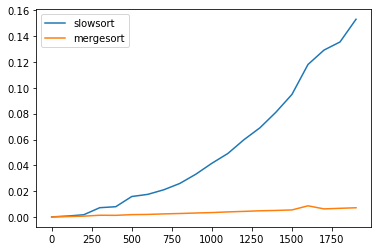

In [44]:
import timeit
import time
import matplotlib.pyplot as plt

def _template_func(setup, func):
    """Create a timer function. Used if the "statement" is a callable."""
    def inner(_it, _timer, _func=func):
        setup()
        _t0 = _timer()
        for _i in _it:
            retval = _func()
        _t1 = _timer()
        return _t1 - _t0, retval
    return inner

timeit._template_func = _template_func

t_slow_sort = []
t_merge_sort = []
ns = []
for n in range(1, 2_000, 100):
    cards = list(range(n))
    rnd.shuffle(cards)
    
    ns.append(n)
    t = timeit.Timer(lambda : slow_sort(cards))
    t_slow_sort.append(t.timeit(number=1))
    
    t = timeit.Timer(lambda : merge_sort(cards))
    t_merge_sort.append(t.timeit(number=1))
    
    
plt.plot(ns, t_slow_sort, label='slowsort')
plt.plot(ns, t_merge_sort, label='mergesort')
plt.legend()
plt.show()